In [1]:
# PIMA INDIANS DIABETES DATABASE
# DataZen project
# Submitted by: Mahima Jain

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# DATA CLEANING: removing 0 or null values
diabetes_df.isnull().sum() # check for null values
#diabetes_df.isnull().any().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#glucose_mean_positive_df= diabetes_df.groupby('Outcome'==0)[[Glucose]].mean()
diabetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
diabetes_df.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


In [9]:
diabetes_df.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000    2.0  109.980000  107.0     68.184000   70.0   
1          4.865672    4.0  141.257463  140.0     70.824627   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           19.664000   21.0   68.792000   39.0  30.304200  30.05   
1           22.164179   27.0  100.335821    0.0  35.142537  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000   27.0  
1                       0.550500  0.449  37.067164   36.0

In [10]:
out0=diabetes_df[diabetes_df.Outcome==0]
out1=diabetes_df[diabetes_df.Outcome==1]

In [11]:
out0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [12]:
out1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [13]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
for ind in range(len(diabetes_df)):
    if diabetes_df.loc[ind, 'Outcome'] == 0 and diabetes_df.loc[ind, 'SkinThickness'] ==0:
        diabetes_df.at[ind,'SkinThickness']=20
    elif diabetes_df.loc[ind, 'Outcome'] == 1 and diabetes_df.loc[ind, 'SkinThickness'] ==0:
        diabetes_df.at[ind,'SkinThickness']=22

In [15]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,22,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,22,0,30.1,0.349,47,1


In [16]:
for ind in range(len(diabetes_df)):
    if diabetes_df.loc[ind, 'Outcome'] == 0 and diabetes_df.loc[ind, 'Insulin'] ==0:
        diabetes_df.at[ind,'Insulin']=69
    elif diabetes_df.loc[ind, 'Outcome'] == 1 and diabetes_df.loc[ind, 'Insulin'] ==0:
        diabetes_df.at[ind,'Insulin']=100

In [17]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,100,33.6,0.627,50,1
1,1,85,66,29,69,26.6,0.351,31,0
2,8,183,64,22,100,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,69,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,22,100,30.1,0.349,47,1


In [18]:
# Number of 0 values in Glucose-5, BloodPressure-35 , BMI-11 , DiabetesPedigree-0 , Age-0
count=0
for ind in range(len(diabetes_df)):
    if diabetes_df.loc[ind, 'Glucose'] == 0:
        count+=1
    

In [19]:
count

5

In [20]:
'''
	Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
Outcome								
0	3.298000	109.980000	68.184000	19.664000	68.792000	30.304200	0.429734	31.190000
1	4.865672	141.257463	70.824627	22.164179	100.335821	35.142537	0.550500	37.067164
'''

for ind in range(len(diabetes_df)):
    if diabetes_df.loc[ind, 'Outcome'] == 0 and diabetes_df.loc[ind, 'Glucose'] ==0:
        diabetes_df.at[ind,'Glucose']=110
    elif diabetes_df.loc[ind, 'Outcome'] == 1 and diabetes_df.loc[ind, 'Glucose'] ==0:
        diabetes_df.at[ind,'Glucose']=141
        
for ind in range(len(diabetes_df)):
    if diabetes_df.loc[ind, 'Outcome'] == 0 and diabetes_df.loc[ind, 'BloodPressure'] ==0:
        diabetes_df.at[ind,'BloodPressure']=68
    elif diabetes_df.loc[ind, 'Outcome'] == 1 and diabetes_df.loc[ind, 'BloodPressure'] ==0:
        diabetes_df.at[ind,'BloodPressure']=71
        
for ind in range(len(diabetes_df)):
    if diabetes_df.loc[ind, 'Outcome'] == 0 and diabetes_df.loc[ind, 'BMI'] ==0:
        diabetes_df.at[ind,'BMI']=30
    elif diabetes_df.loc[ind, 'Outcome'] == 1 and diabetes_df.loc[ind, 'BMI'] ==0:
        diabetes_df.at[ind,'BMI']=35

In [21]:
diabetes_df # Data is clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,100,33.6,0.627,50,1
1,1,85,66,29,69,26.6,0.351,31,0
2,8,183,64,22,100,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,69,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,22,100,30.1,0.349,47,1


In [22]:
###### Data Cleaning is done ######

###### Analysing Data using various plots #########

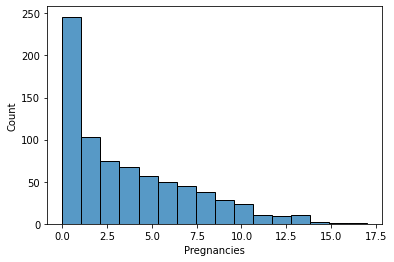

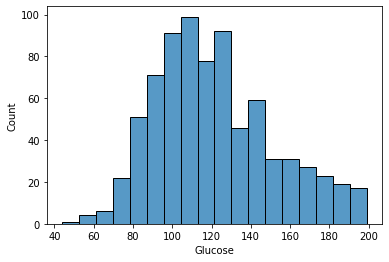

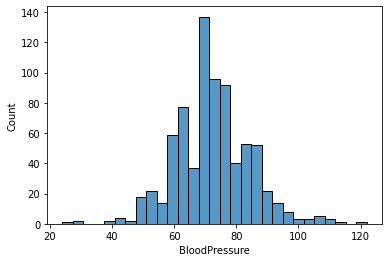

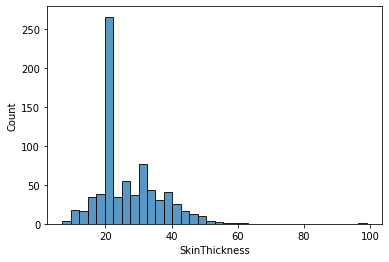

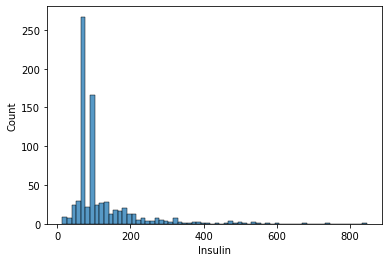

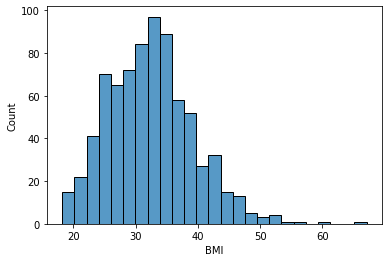

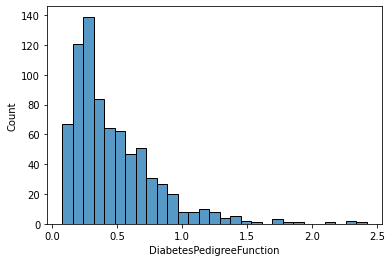

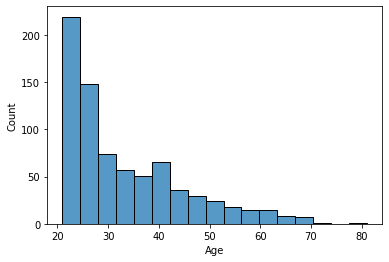

In [23]:
# Analysis of each factor using Histogram

for ind, col in enumerate(diabetes_df.columns[:-1]):
    plt.figure(ind)
    sb.histplot(diabetes_df[col])
    # you can also use displot or distplot(older version, will give you a warning)

In [24]:
#Correlation among different parameters wrt outcome

diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129887,0.209372,0.018358,-0.003150,0.024346,-0.033523,0.544341,0.221898
Glucose,0.129887,1.000000,0.224190,0.177222,0.431280,0.236120,0.138158,0.268604,0.495882
BloodPressure,0.209372,0.224190,1.000000,0.138542,0.020900,0.285602,0.000777,0.326838,0.169076
SkinThickness,0.018358,0.177222,0.138542,1.000000,0.247801,0.547537,0.155449,0.031067,0.206841
Insulin,-0.003150,0.431280,0.020900,0.247801,1.000000,0.217759,0.168064,0.051021,0.257345
BMI,0.024346,0.236120,0.285602,0.547537,0.217759,1.000000,0.152567,0.028120,0.316018
DiabetesPedigreeFunction,-0.033523,0.138158,0.000777,0.155449,0.168064,0.152567,1.000000,0.033561,0.173844
Age,0.544341,0.268604,0.326838,0.031067,0.051021,0.028120,0.033561,1.000000,0.238356
Outcome,0.221898,0.495882,0.169076,0.206841,0.257345,0.316018,0.173844,0.238356,1.000000


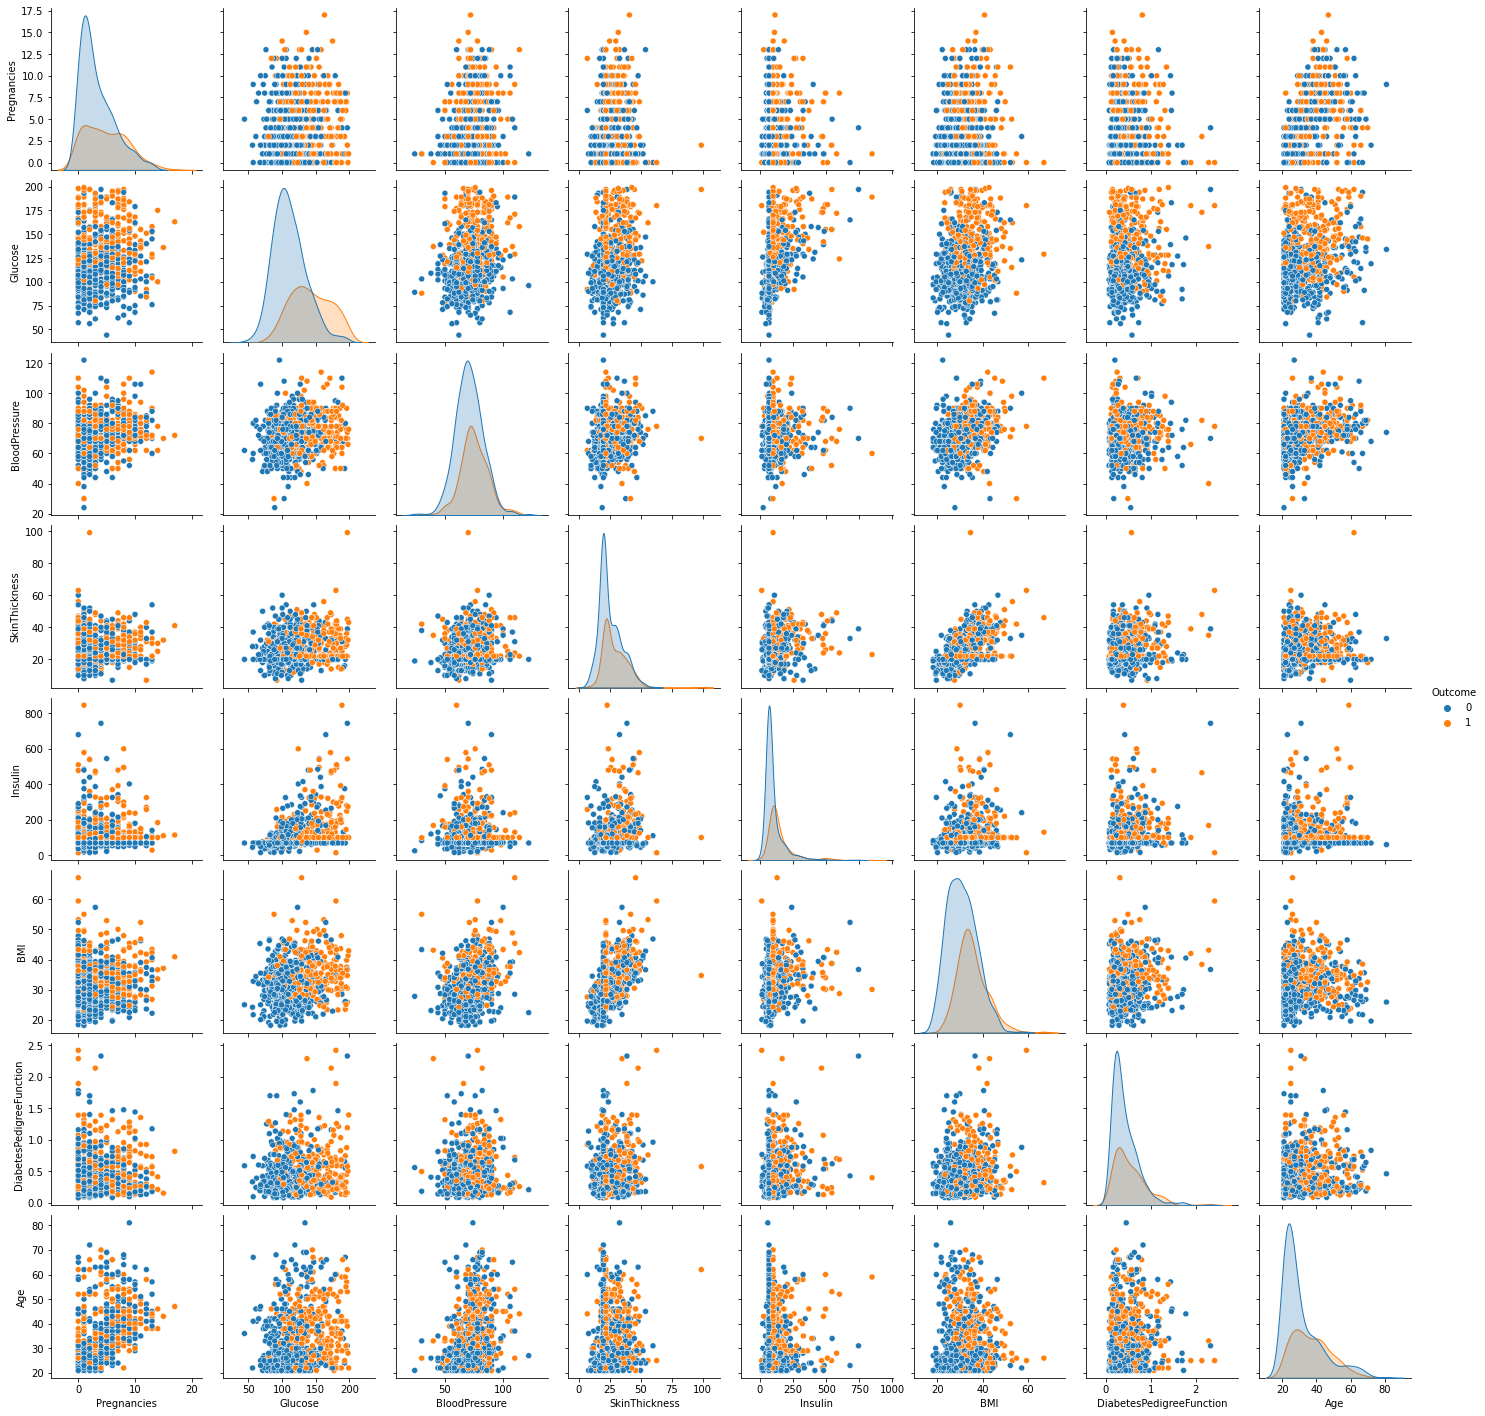

In [25]:
# using scatter matrix
sb.pairplot(diabetes_df, hue="Outcome")

In [26]:
#sb.pairplot(diabetes_df, hue="Outcome", diag_kind="hist") we can represent through this also

<AxesSubplot:>

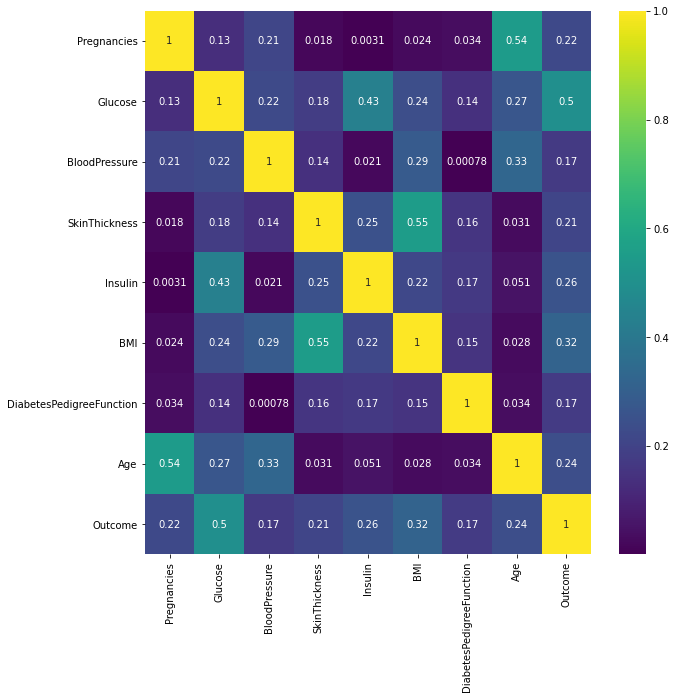

In [27]:
# Using Heatmap

plt.figure(figsize=(10,10))
sb.heatmap(np.abs(diabetes_df.corr()), annot=True, cmap="viridis") # fmt="0.2f"

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

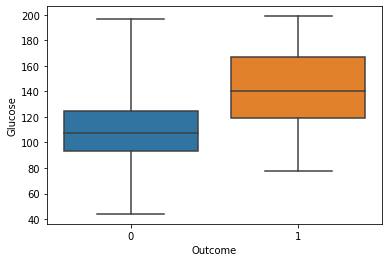

In [28]:
# Comparison of parameter values with outcome
sb.boxplot(x="Outcome", y="Glucose", data=diabetes_df, whis=4.0)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

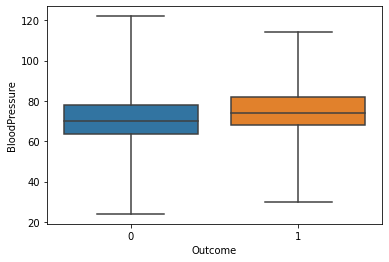

In [29]:
sb.boxplot(x="Outcome", y="BloodPressure", data=diabetes_df, whis=4.0)

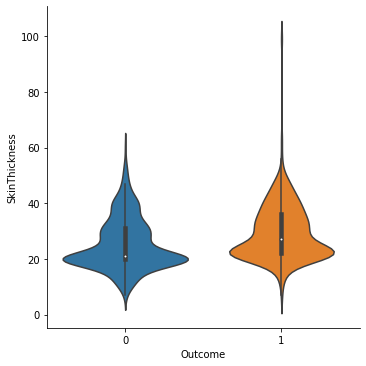

In [30]:
sb.catplot(x="Outcome", y="SkinThickness", data=diabetes_df, kind="violin")
#sb.boxplot(x="Outcome", y="Insulin", data=diabetes_df, whis=10.0)

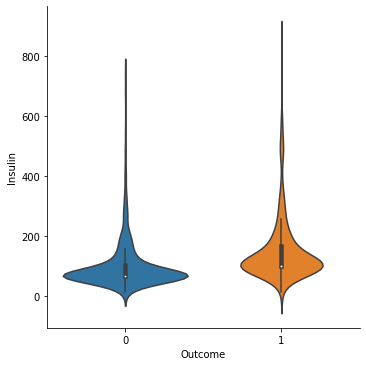

In [31]:
sb.catplot(x="Outcome", y="Insulin", data=diabetes_df, kind="violin")

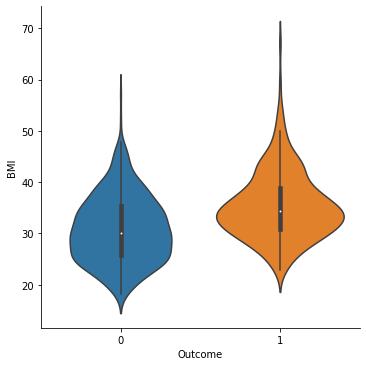

In [32]:
sb.catplot(x="Outcome", y="BMI", data=diabetes_df, kind="violin")

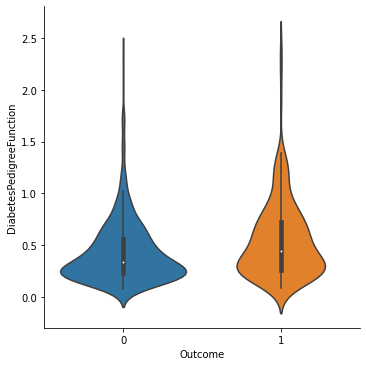

In [33]:
sb.catplot(x="Outcome", y="DiabetesPedigreeFunction", data=diabetes_df, kind="violin")

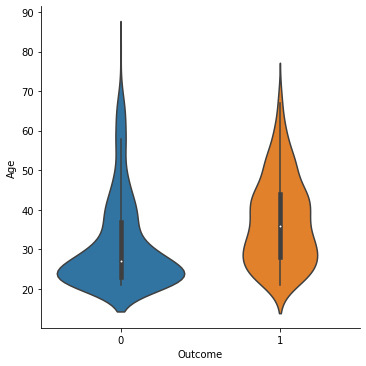

In [34]:
sb.catplot(x="Outcome", y="Age", data=diabetes_df, kind="violin")

In [35]:
# Using Logistic Regression algorithm for predicion and defining relation between dependent and independent parameters

In [36]:
indep_col = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dep_col = ['Outcome']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier

In [38]:

x=diabetes_df[indep_col].values
y=diabetes_df[dep_col].values

In [39]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.01, random_state=1,stratify=y)

In [40]:
y_train.shape
x_train.shape

(760, 8)

In [41]:
model = LogisticRegression()

In [42]:
model.fit(x_train, y_train.ravel())

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
accuracy=model.score(x_test, y_test)

In [44]:
print("Accuracy = ", accuracy*100, "%")

Accuracy =  87.5 %


In [47]:
predx=model.predict(x_test)

In [58]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2
meanaper=MAE(y_test,predx)
score=r2(y_test,predx)

In [59]:
print("As the score is =", score*100, "hence the model performs better")

As the score is = 46.666666666666664 hence the model performs better
